# 1. Generate a dataset with make−regression function and create a data frame. Output 2 different  data frames by changing the parameters of make−regression function. Plot one scatter-plot, one bar plot, one seaborn-scatter plot  for each of the data frame.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [14]:
X, y = datasets.make_regression(n_samples=500, n_features=6)

dataset1 = pd.DataFrame(X, columns=[f"x{i}" for i in range(1, 7)])
dataset1["y"] = y


In [15]:
dataset1.head()

,x1,x2,x3,x4,x5,x6,y
0,-2.050627,-0.749091,-2.994578,-0.098223,0.692660,0.866749,-189.404892
1,0.621794,-0.497787,-0.539741,-0.421713,0.230283,0.681551,-58.744657
2,0.139108,-0.042954,-0.146100,-0.684811,0.580726,-0.105230,-63.148940
3,-0.376773,-1.379988,-0.049405,0.501617,-0.614481,-0.273401,-62.509241
4,0.871310,0.345450,-0.798427,-1.044487,-2.782029,0.742252,-79.032424


In [16]:
X, y = datasets.make_regression(n_samples=600, n_features=7)
dataset2 = pd.DataFrame(X, columns=[f"x{i}" for i in range(1, 8)])
dataset2["y"] = y

In [17]:
dataset2.head()

,x1,x2,x3,x4,x5,x6,x7,y
0,-0.322562,0.856422,0.407892,-0.220620,0.064608,0.708131,-1.540867,-1.685409
1,-0.189002,1.349797,2.660629,-0.355129,0.149434,-0.945172,0.975627,35.136030
2,-0.238671,-0.125596,1.037507,-0.441822,-1.095367,-0.329355,1.169780,-4.181942
3,0.816380,1.048765,0.312735,0.989544,1.589491,0.226183,-1.591809,100.349219
4,-0.822490,0.787948,-0.402252,0.827002,0.157162,0.602057,-0.508336,89.410300


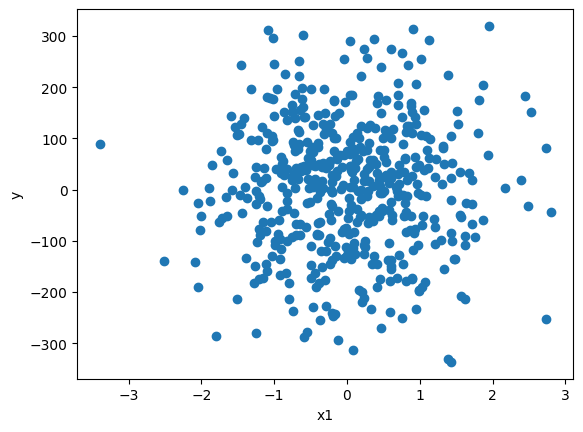

In [18]:
plt.scatter(dataset1["x1"], dataset1["y"])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

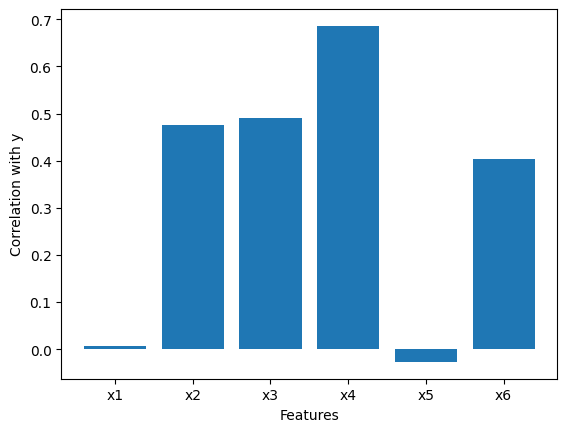

In [19]:
corr = dataset1.corr()["y"].drop("y")
plt.bar(corr.index, corr.values)
plt.ylabel("Correlation with y")
plt.xlabel("Features")
plt.show()


<Axes: xlabel='x1', ylabel='y'>

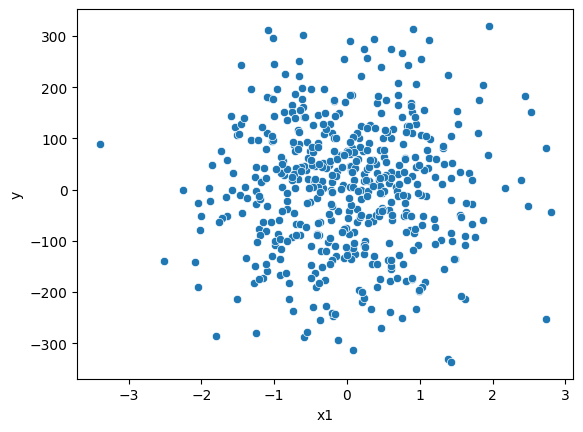

In [20]:
sns.scatterplot(data=dataset1, x="x1", y="y")

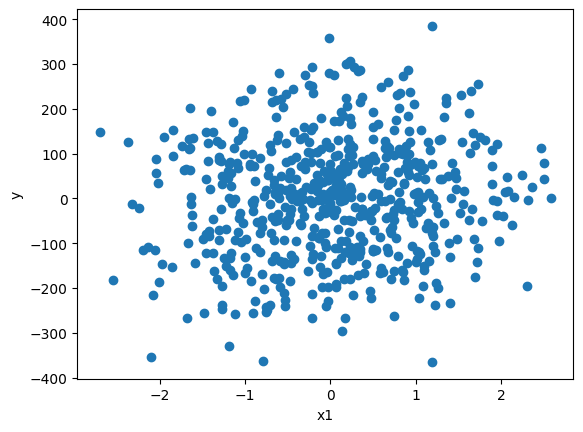

In [21]:
plt.scatter(dataset2["x1"], dataset2["y"])
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

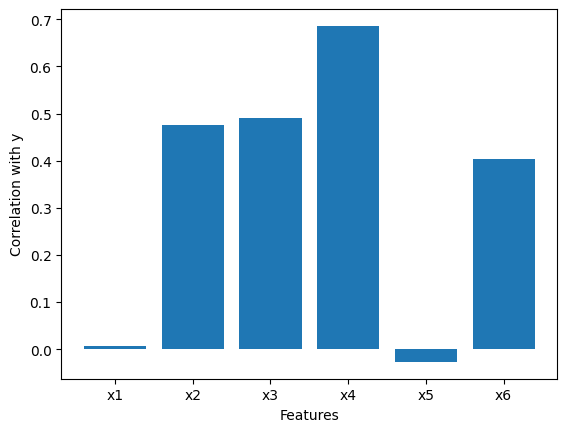

In [22]:
plt.bar(corr.index, corr.values)
plt.ylabel("Correlation with y")
plt.xlabel("Features")
plt.show()

<Axes: xlabel='x1', ylabel='y'>

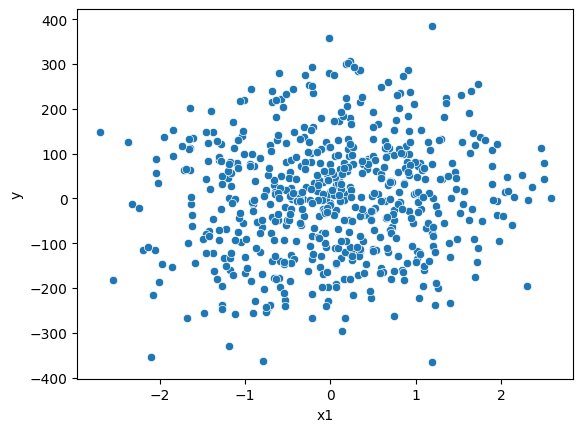

In [23]:
sns.scatterplot(data=dataset2, x="x1", y="y")

# 2.Generate the model in order to predict the “revenue” based on the feature “temperature”, using linear regression for the given dataset “icecream.csv” with the split of 80 and 20 for training and testing the dataset. Analyze the performance and use scatter plot to project the observed and the predicted results.  

In [24]:
icecream_data = pd.read_csv("icecream.csv")
icecream_data.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [25]:
X = icecream_data[["Temperature"]]
Y = icecream_data[["Revenue"]]

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1172)

In [27]:
reg = linear_model.LinearRegression()
trained_model = reg.fit(X_train, Y_train)

In [28]:
y_predicted = trained_model.predict(X_test)

In [29]:
mse = mean_squared_error(Y_test, y_predicted)
r2 = r2_score(Y_test, y_predicted)
print(mse)
print(r2)

635.9597660838771
0.979960205758689


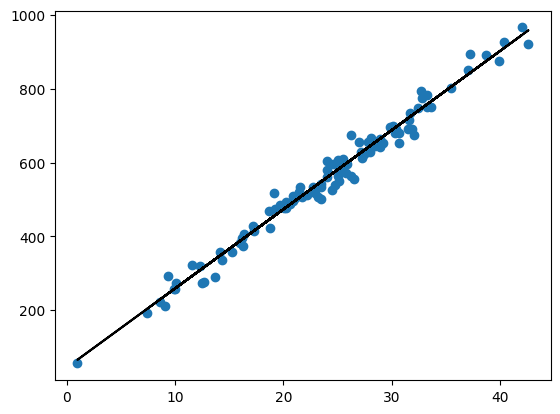

In [30]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, y_predicted, color="black")

# 3. Generate  the model in order to predict the “weight” based on the features “l1, l2, l3, height, width”  using linear regression for the given dataset “fishdata.csv” with the following splits  for training and testing the dataset.  Analyze the performance for the below splits and use scatter plot to project the observed and the predicted results.

a. 80:20

b. 75:25

In [31]:
fish_data = pd.read_csv("fishdata.csv")
fish_data.columns = ["Species", "Weight", "l1", "l2", "l3", "Height", "Width"]
fish_data

,Species,Weight,l1,l2,l3,Height,Width
0,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
1,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
2,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
3,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
4,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
...,...,...,...,...,...,...,...
153,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
154,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
155,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
156,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [32]:
X = fish_data[["l1", "l2", "l3", "Height", "Width"]]
Y = fish_data[["Weight"]]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1172)

In [34]:
reg = linear_model.LinearRegression()
trained_model = reg.fit(X_train, Y_train)

In [35]:
y_predicted = reg.predict(X_test)

In [36]:
mse = mean_squared_error(Y_test, y_predicted)
r2 = r2_score(Y_test, y_predicted)
print(mse)
print(r2)

9893.16669745017
0.9208521079647887


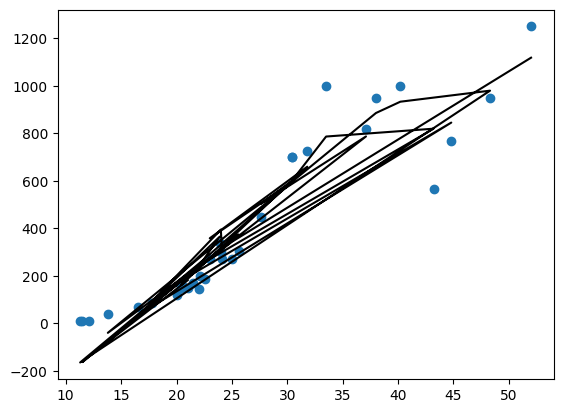

In [37]:
plt.scatter(X_test["l1"], Y_test)
plt.plot(X_test["l1"], y_predicted, color="black")

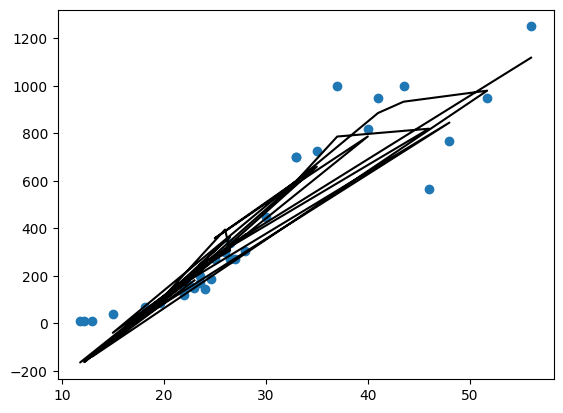

In [38]:
plt.scatter(X_test["l2"], Y_test)
plt.plot(X_test["l2"], y_predicted, color="black")

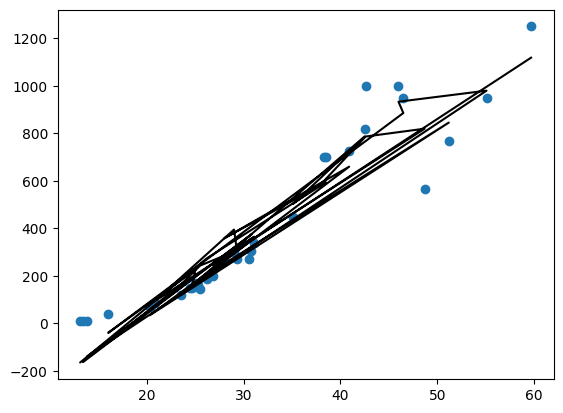

In [39]:
plt.scatter(X_test["l3"], Y_test)
plt.plot(X_test["l3"], y_predicted, color="black")

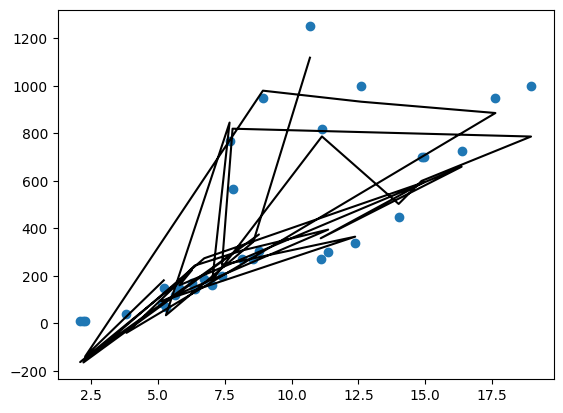

In [40]:
plt.scatter(X_test["Height"], Y_test)
plt.plot(X_test["Height"], y_predicted, color="black")

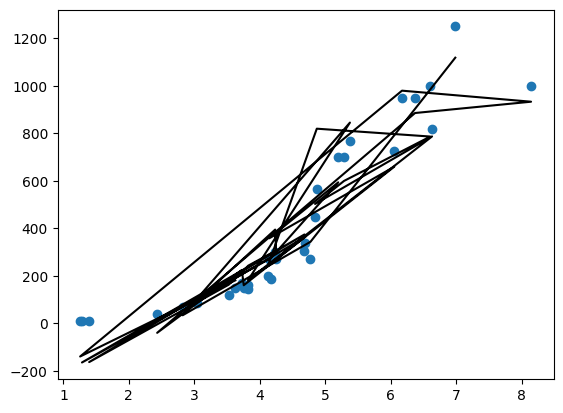

In [41]:
plt.scatter(X_test["Width"], Y_test)
plt.plot(X_test["Width"], y_predicted, color="black")

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1172)

In [43]:
trained_model = reg.fit(X_train, Y_train)

In [44]:
y_predicted = reg.predict(X_test)

In [45]:
mse = mean_squared_error(Y_test, y_predicted)
r2 = r2_score(Y_test, y_predicted)
print(mse)
print(r2)

11514.43285046863
0.9053230269026712


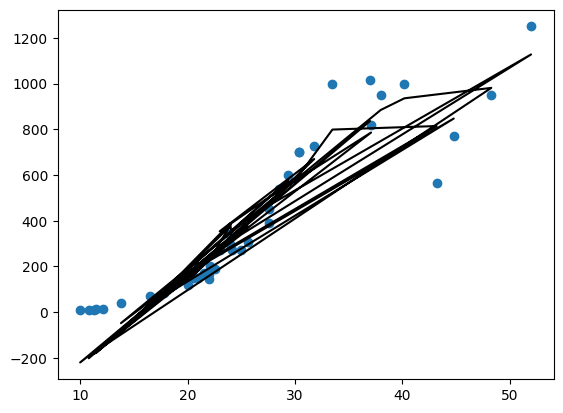

In [46]:
plt.scatter(X_test["l1"], Y_test)
plt.plot(X_test["l1"], y_predicted, color="black")

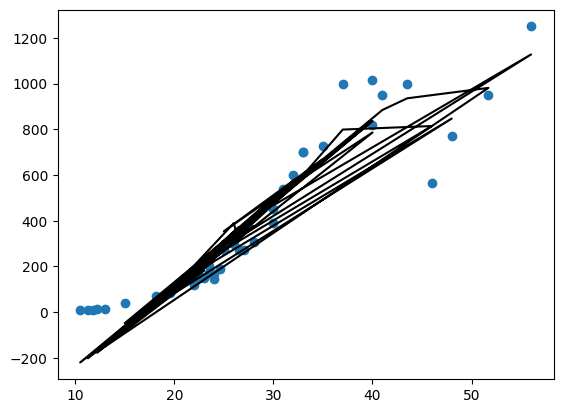

In [47]:
plt.scatter(X_test["l2"], Y_test)
plt.plot(X_test["l2"], y_predicted, color="black")

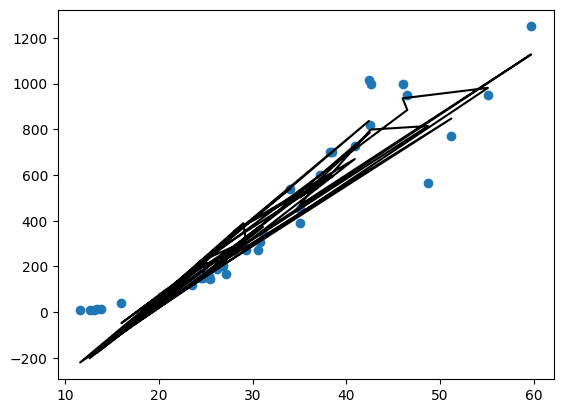

In [48]:
plt.scatter(X_test["l3"], Y_test)
plt.plot(X_test["l3"], y_predicted, color="black")